# <center><span style="color:purple;">Movie Recommendation System</span></center>

**Data Description:**       
The data consists of 105339 ratings applied over 10329 movies. The average rating is 
3.5, and the minimum and maximum rating is 0.5 and 5, respectively. There are 668 
users who have given their ratings for 149532 movies.  

There are two data files that are provided:  
__Movies.csv__  
➢ movieId: ID assigned to a movie  
➢ title: Title of a movie  
➢ genres: pipe separated list of movie genres.  
__Ratings.csv__  
➢ userId: ID assigned to a user  
➢ movieId: ID assigned to a movie  
➢ rating: rating by a user of a movie  
➢ Timestamp: time at which the rating was provided.

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
movie = pd.read_csv(r"C:\Users\Muthukumaran\OneDrive\Documents\My DIY Notebooks\PROJECT\movies.csv")
movie.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [3]:
rating = pd.read_csv(r"C:\Users\Muthukumaran\OneDrive\Documents\My DIY Notebooks\PROJECT\ratings.csv")
rating.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [4]:
print(movie.shape)
print(rating.shape)

(10329, 3)
(105339, 4)


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [7]:
movie.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [8]:
movie.describe(include='O')

,title,genres
count,10329,10329
unique,10327,938
top,War of the Worlds (2005),Drama
freq,2,1385


In [9]:
df = pd.merge(movie,rating,on='movieId')

In [10]:
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [11]:
movie.movieId.nunique()

10329

In [12]:
rating.userId.nunique()

668

In [13]:
print(movie.shape)
print(rating.shape)
print(df.shape)

(10329, 3)
(105339, 4)
(105339, 6)


From the above three lines of code output, we came to know that there are 10329 unique movies and 668 unique users are there to rate the movies. So, the final merged dataframe contains 105339 rows because a single movie can be rated by many users or viceversa. So that the length of rows increased.

In [14]:
df.head(10)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,5.0,1350206819
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28,3.0,884098350
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29,4.0,846942580
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.5,1292690069
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,4.0,832397496


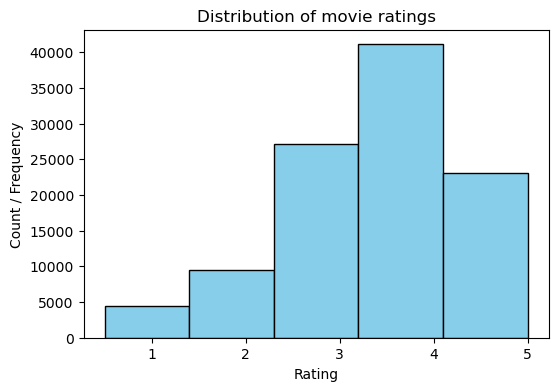

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.hist(x=df['rating'],bins=5,color='skyblue',edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Count / Frequency')
plt.title('Distribution of movie ratings')

plt.show()

In [16]:
all_genres = df['genres'].str.split('|').explode()
unique_genres = all_genres.unique()
# print(unique_genres)

### <center><span style="color:green;">Popularity Based Recommendation System</span></center>

In [23]:
print("Available genres:")
print('=================')
for i, genre in enumerate(unique_genres,1):
    print(f"{i}. {genre}")

    #Function to filter by Genre
def filter_by_genre(df, genre):
    return df[df['genres'].str.contains(genre, case=False, na=False)]

#Function to calculate Average ratings and count of ratings
def calculate_popularity(df):
    # Group by movieId and calculate average rating and count of ratings
    popularity = df.groupby('movieId').agg({'rating': ['mean', 'count']})
    # Rename columns
    popularity.columns = ['average_rating', 'rating_count']
    return popularity

#Function to filter by minimum reviews threshold
def filter_by_threshold(df, threshold):
    return df[df['rating_count'] >= threshold]

#Function to get Top N Recommendations
def get_top_n_recommendations(df, n):
    return df.sort_values(by='average_rating', ascending=False).head(n)

#Function to Recommend:
def recommend_movies(genre, min_reviews, num_recommendations):
    # Filter movies by genre
    genre_movies = filter_by_genre(df, genre)
    # Calculate popularity metrics
    popularity = calculate_popularity(genre_movies)
    # Filter by minimum reviews threshold
    filtered_popularity = filter_by_threshold(popularity, min_reviews)
    # Get top N recommendations
    top_n = get_top_n_recommendations(filtered_popularity, num_recommendations)
    # Merge with movie titles
    top_n = top_n.merge(movie[['movieId', 'title']], on='movieId')
    return top_n[['title', 'average_rating', 'rating_count']]

genre_choice = int(input("Enter the number corresponding to your preferred genre: "))
selected_genre = unique_genres[genre_choice - 1]
print('--------------------------')
print(f"You selected: {selected_genre}")
print('--------------------------')
min_reviews = int(input('Enter the minimum review:'))
print('--------------------------')
num_recommendations = int(input('Enter the number of Recommendations:'))
print('--------------------------')
recommendations=recommend_movies(selected_genre,min_reviews,num_recommendations)
display(recommendations)

Available genres:
1. Adventure
2. Animation
3. Children
4. Comedy
5. Fantasy
6. Romance
7. Drama
8. Action
9. Crime
10. Thriller
11. Horror
12. Mystery
13. Sci-Fi
14. IMAX
15. War
16. Musical
17. Documentary
18. Western
19. Film-Noir
20. (no genres listed)
Enter the number corresponding to your preferred genre: 8
--------------------------
You selected: Action
--------------------------
Enter the minimum review:200
--------------------------
Enter the number of Recommendations:5
--------------------------


,title,average_rating,rating_count
0,"Matrix, The (1999)",4.264368,261
1,Star Wars: Episode V - The Empire Strikes Back...,4.228070,228
2,Raiders of the Lost Ark (Indiana Jones and the...,4.212054,224
3,Star Wars: Episode IV - A New Hope (1977),4.188645,273
4,Fight Club (1999),4.188406,207


### <center><span style="color:green;">Content Based Recommendation System</span></center>

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

df_crs = movie.iloc[:,1:]

# Create a count matrix
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'))
count_matrix = count_vectorizer.fit_transform(df_crs['genres'])

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(count_matrix,count_matrix)

def get_recommendations(title, N):
    # Get the index of the movie that matches the title
    idx = df_crs[df_crs['title'] == title].index[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the top N most similar movies
    sim_scores = sim_scores[1:N+1]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top N most similar movies
    return df_crs['title'].iloc[movie_indices]

In [24]:
title_df = pd.DataFrame(data= df['title'].unique(),columns=['Title'])
while True:
    name_like = input('Your Search: ')
    print("====================================================================================")
    filtered_df = title_df[title_df['Title'].str.startswith(name_like)]
    
    if not filtered_df.empty:
        print('Results:')
        display(filtered_df)
        break
    else:
        print("""Movies not Found!
Because your search is case sensitive. So, Take a look at your Search""")
print("----------------------------------------------------------------------------------------")
movie_title = input("Now, search for Similiar movies by copying from results: ")
print("----------------------------------------------------------------------------------------")
num_recom = int(input('Number of Recommendations you want: '))
recommended_movies = get_recommendations(movie_title, num_recom)
print("========================================================================================")
print(f"Similiar {num_recom} movies of {movie_title}")
display(recommended_movies)

Your Search: E
Results:


,Title
56,Eye for an Eye (1996)
203,Eat Drink Man Woman (Yin shi nan nu) (1994)
204,Exotica (1994)
205,Exit to Eden (1994)
206,Ed Wood (1994)
...,...
10269,Eastern Boys (2014)
10272,Echoes of War (2015)
10279,Everything's Gonna Be Great (1998)
10300,Everest (2015)


----------------------------------------------------------------------------------------
Now, search for Similiar movies by copying from results: Exotica (1994)
----------------------------------------------------------------------------------------
Number of Recommendations you want: 8
Similiar 8 movies of Exotica (1994)


25                        Othello (1995)
30                Dangerous Minds (1995)
37       Cry, the Beloved Country (1995)
40                    Restoration (1995)
51                        Georgia (1995)
52          Home for the Holidays (1995)
57             Mr. Holland's Opus (1995)
83    Journey of August King, The (1995)
Name: title, dtype: object

### <center><span style="color:green;">Collaborative Based Recommendation System</span></center>

In [27]:
user_item_matrix = rating.pivot(index='userId', columns='movieId', values='rating').fillna(0)
#user_item_matrix

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
def find_similar_users(user_id, k=100):
    user_vector = user_item_matrix.loc[user_id].values.reshape(1, -1)
    knn = NearestNeighbors(n_neighbors=k, metric='cosine')
    knn.fit(user_item_matrix)
    distances, indices = knn.kneighbors(user_vector)
    similar_users = user_item_matrix.index[indices.flatten()].tolist()
    return similar_users

In [25]:
def recommend_movies(user_id, n=5, k=100):
    similar_users = find_similar_users(user_id, k)
    similar_users_ratings = user_item_matrix.loc[similar_users].mean(axis=0)
    user_ratings = user_item_matrix.loc[user_id]
    recommendations = similar_users_ratings[user_ratings == 0].sort_values(ascending=False).head(n)
    return recommendations.index.tolist()

# Inputs for the recommender
user_id = int(input('Enter userid between 1 and 668: '))
num_recommendations = int(input('Enter number of Recommendations you want: '))
threshold_similar_users = 100

recommended_movies = recommend_movies(user_id, num_recommendations, threshold_similar_users)
recommended_movie = pd.DataFrame(movie.loc[recommended_movies,'title'])
print("================================================================================")
print(f"Recommended movies for UserId {user_id} are")
display(recommended_movie)

Enter userid between 1 and 668: 5
Enter number of Recommendations you want: 5
Recommended movies for UserId 5 are


,title
356,In the Mouth of Madness (1995)
260,Pulp Fiction (1994)
4993,Ninja Scroll (Jûbei ninpûchô) (1995)
296,"Walking Dead, The (1995)"
1196,Love Jones (1997)
